In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('credit_card_default_analysis.csv')
df.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARITAL,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP.1,PAY_AUG.1,PAY_JUL.1,PAY_JUN.1,PAY_MAY.1,PAY_APR.1,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
median_groups = df[['LIMIT_BAL', 'default']].groupby('default').median()
# median_groups = median_groups.T
median_groups['type'] = ['No', 'Yes']
median_groups

,LIMIT_BAL,type
default,,
0,150000,No
1,90000,Yes


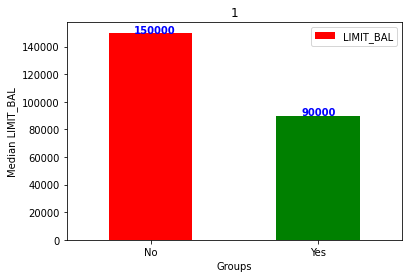

In [4]:
ax = median_groups.plot.bar(x='type', y='LIMIT_BAL', rot=0,  color=['red', 'green'])
plt.title('1')
plt.xlabel('Groups')
plt.ylabel('Median LIMIT_BAL') 

for i, v in enumerate(median_groups['LIMIT_BAL']):
#     print(v)
    ax.text(i - 0.1, v, str(v), color='blue', fontweight='bold')

plt.show()

In [5]:
group_no = df[df['default'] == 0][['ID','LIMIT_BAL','GENDER','EDUCATION','MARITAL','AGE','default']]
group_yes = df[df['default'] == 1][['ID','LIMIT_BAL','GENDER','EDUCATION','MARITAL','AGE','default']]

In [6]:
from numpy.random import randn
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt
from scipy.stats import stats

def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s


In [7]:
print('Appropriate effect size is:', cohend(group_no['LIMIT_BAL'],group_yes['LIMIT_BAL']))

Appropriate effect size is: 0.37430331962716074


In [8]:
# Example of the Shapiro-Wilk Normality Test
print("""Assumptions: \nObservations in each sample are independent and identically distributed (iid). \n""")
from scipy.stats import shapiro
stat, p = shapiro(group_no['LIMIT_BAL'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Assumptions: 
Observations in each sample are independent and identically distributed (iid). 

stat=0.920, p=0.000
Probably not Gaussian


/home/tair/anaconda3/envs/data_science/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<AxesSubplot:>

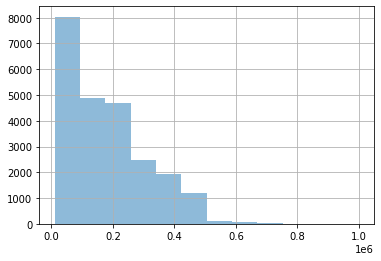

In [9]:
group_no.LIMIT_BAL.hist(bins=12, alpha=0.5)

In [10]:
print("""Assumptions: \nObservations in each sample are independent and identically distributed (iid). \n""")

from scipy.stats import shapiro
stat, p = shapiro(group_yes['LIMIT_BAL'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

Assumptions: 
Observations in each sample are independent and identically distributed (iid). 

stat=0.855, p=0.000
Probably not Gaussian


<AxesSubplot:>

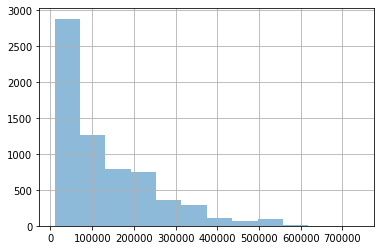

In [11]:
group_yes.LIMIT_BAL.hist(bins=12, alpha=0.5)

In [12]:
print("""Assumptions: \nObservations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance. \n""")

from scipy.stats import pearsonr
stat, p = pearsonr(df['LIMIT_BAL'], df['default'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

Assumptions: 
Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance. 

stat=-0.154, p=0.000
Probably dependent


In [13]:
print("""Tests whether the means of two independent samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.
""")
from scipy.stats import ttest_ind
stat, p = ttest_ind(group_yes['LIMIT_BAL'], group_no['LIMIT_BAL'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

Tests whether the means of two independent samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.

stat=-26.909, p=0.000
Probably different distributions


# 2.GENDER

In [14]:
df

,ID,LIMIT_BAL,GENDER,EDUCATION,MARITAL,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP.1,PAY_AUG.1,PAY_JUL.1,PAY_JUN.1,PAY_MAY.1,PAY_APR.1,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [15]:
gender_groups = df[['GENDER', 'default']].groupby('default')
# median_groups = median_groups.T
# education_groups['type'] = ['No', 'Yes']
gender_groups = pd.DataFrame(gender_groups['GENDER'].value_counts())
gender_groups.columns=['type']
gender_groups

type
default GENDER       
0       2       14349
        1        9015
1       2        3763
        1        2873

In [16]:
gender_groups.unstack(level=0)

type      
default      0     1
GENDER              
1         9015  2873
2        14349  3763

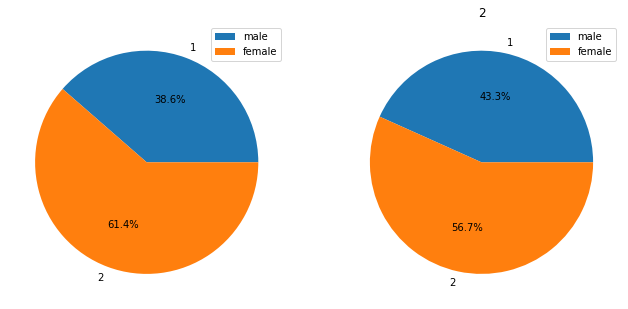

In [17]:
# gender_groups.unstack().plot.pie(subplots=True, figsize=(11, 6))

ax1, ax2 = gender_groups.unstack(level=0).plot.pie(subplots=True, figsize=(11, 6), autopct='%1.1f%%')
ax1.set_ylabel('')
ax2.set_ylabel('')
ax1.legend(['male', 'female'])
ax2.legend(['male', 'female'])

plt.title('2')
plt.show()

In [18]:
print("""Tests whether two categorical variables are related or independent.

Assumptions

Observations used in the calculation of the contingency table are independent.
Dependent. \n""")
# Example of the Chi-Squared Test
edu = list(gender_groups.unstack(level=0).iloc[:,0])
defa = list(gender_groups.unstack(level=0).iloc[:,1])

from scipy.stats import chi2_contingency
table = [edu,defa]
df['EDUCATION']
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')


Tests whether two categorical variables are related or independent.

Assumptions

Observations used in the calculation of the contingency table are independent.
Dependent. 

stat=47.709, p=0.000
Probably dependent


In [19]:
print('Alternative: Kendall’s Rank Correlation, Spearman’s Rank Correlation')

Alternative: Kendall’s Rank Correlation, Spearman’s Rank Correlation


# 3. EDUCATION

In [20]:
education_groups = df[['EDUCATION', 'default']].groupby('default')
# median_groups = median_groups.T
# education_groups['type'] = ['No', 'Yes']
education_level_groups = pd.DataFrame(education_groups['EDUCATION'].value_counts())
education_level_groups

EDUCATION
default EDUCATION           
0       2              10700
        1               8549
        3               3680
        5                262
        4                116
        6                 43
        0                 14
1       2               3330
        1               2036
        3               1237
        5                 18
        6                  8
        4                  7

In [21]:
education_level_groups.unstack(level=0)

EDUCATION        
default           0       1
EDUCATION                  
0              14.0     NaN
1            8549.0  2036.0
2           10700.0  3330.0
3            3680.0  1237.0
4             116.0     7.0
5             262.0    18.0
6              43.0     8.0

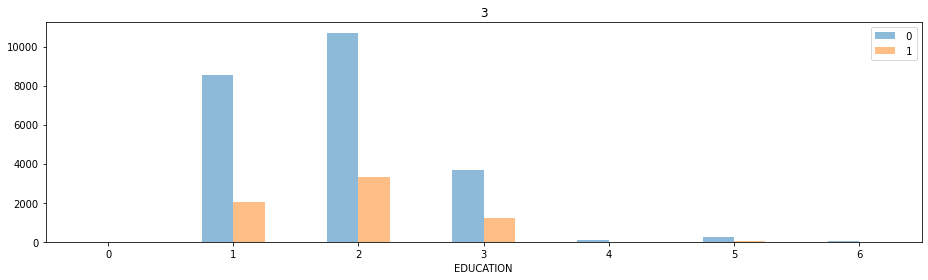

In [22]:
ax = education_level_groups.unstack(level=0).plot(kind='bar', alpha=0.5, subplots=False, stacked=False, rot=0, figsize=(13, 4))

plt.title('3')    
plt.tight_layout()
handles, labels = ax.get_legend_handles_labels()
labels_new = [label.strip('()').split(',')[1] for label in labels]
plt.legend(handles, labels_new)
plt.show()

In [23]:
print("""Tests whether the distributions of two or more independent samples are equal or not.

Assumptions

1.Observations in each sample are independent and identically distributed (iid).
2.Observations in each sample can be ranked. \n""")
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = education_level_groups.unstack(level=0).iloc[1:,0]
data2 = education_level_groups.unstack(level=0).iloc[1:,1]

stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


Tests whether the distributions of two or more independent samples are equal or not.

Assumptions

1.Observations in each sample are independent and identically distributed (iid).
2.Observations in each sample can be ranked. 

stat=2.077, p=0.150
Probably the same distribution


In [24]:
print('Alternative: Wilcoxon Signed-Rank Test')

Alternative: Wilcoxon Signed-Rank Test


# 4.MARITAL

In [25]:
df

,ID,LIMIT_BAL,GENDER,EDUCATION,MARITAL,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP.1,PAY_AUG.1,PAY_JUL.1,PAY_JUN.1,PAY_MAY.1,PAY_APR.1,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [26]:
marital_groups = df[['MARITAL', 'default']].groupby('default')
# median_groups = median_groups.T
# education_groups['type'] = ['No', 'Yes']
marital_groups = pd.DataFrame(marital_groups['MARITAL'].value_counts())
marital_groups.columns=['type']
marital_groups

type
default MARITAL       
0       2        12623
        1        10453
        3          239
        0           49
1       2         3341
        1         3206
        3           84
        0            5

In [27]:
marital_groups.unstack(level=0)

type      
default      0     1
MARITAL             
0           49     5
1        10453  3206
2        12623  3341
3          239    84

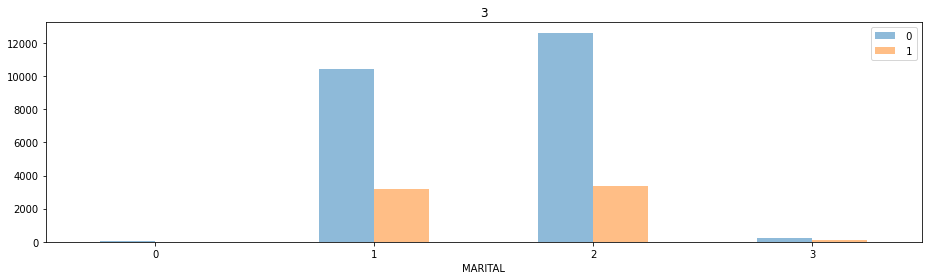

In [28]:
ax = marital_groups.unstack(level=0).plot(kind='bar', alpha=0.5, subplots=False, stacked=False, rot=0, figsize=(13, 4))

plt.title('3')    
plt.tight_layout()
handles, labels = ax.get_legend_handles_labels()
labels_new = [label.strip('()').split(',')[1] for label in labels]
plt.legend(handles, labels_new)
plt.show()

In [29]:
marial = marital_groups.unstack(level=0).iloc[[1,2],:]
marial

type      
default      0     1
MARITAL             
1        10453  3206
2        12623  3341

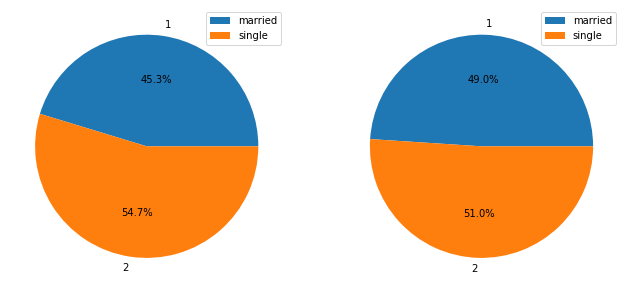

In [30]:
ax1, ax2 = marial.plot.pie(subplots=True, figsize=(11, 6), autopct='%1.1f%%')
ax1.set_ylabel('')
ax2.set_ylabel('')
ax1.legend(['married', 'single'])
ax2.legend(['married', 'single'])

plt.show()

In [31]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = df['default']
data2 = df['MARITAL']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.024, p=0.000
Probably dependent


In [32]:
# Creating a sample data frame
import pandas as pd

# print(LoanData.head())
#########################################################
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=data1,columns=data2)
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

MARITAL   0      1      2    3
default                       
0        49  10453  12623  239
1         5   3206   3341   84
The P-Value of the ChiSq Test is: 8.825862457577375e-08


In [33]:
print("""Tests whether the distributions of two or more independent samples are equal or not.

Assumptions

1.Observations in each sample are independent and identically distributed (iid).
2.Observations in each sample can be ranked. \n""")
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = marital_groups.unstack(level=0).iloc[:,0]
data2 = marital_groups.unstack(level=0).iloc[:,1]

stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


Tests whether the distributions of two or more independent samples are equal or not.

Assumptions

1.Observations in each sample are independent and identically distributed (iid).
2.Observations in each sample can be ranked. 

stat=0.750, p=0.386
Probably the same distribution


In [34]:
print('Alternative: Wilcoxon Signed-Rank Test')

Alternative: Wilcoxon Signed-Rank Test


# 5.AGE

In [35]:
age_groups = df[['AGE', 'default']].groupby('default').mean()
# median_groups = median_groups.T
age_groups['type'] = ['No', 'Yes']
age_groups

,AGE,type
default,,
0,35.417266,No
1,35.725738,Yes


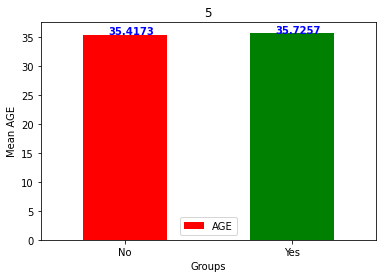

In [36]:

ax = age_groups.plot.bar(x='type', y='AGE', rot=0,  color=['red', 'green'])
plt.title('5')
plt.xlabel('Groups')
plt.ylabel('Mean AGE') 

for i, v in enumerate(age_groups['AGE']):
#     print(v)
    ax.text(i - 0.1, v, str("{:.4f}".format(v)), color='blue', fontweight='bold')

plt.show()

In [37]:
print("""Tests whether the means of two independent samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.
""")
from scipy.stats import ttest_ind
stat, p = ttest_ind(group_yes['AGE'], group_no['AGE'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

Tests whether the means of two independent samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.

stat=2.406, p=0.016
Probably different distributions


<AxesSubplot:>

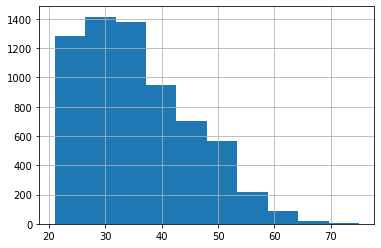

In [38]:
group_yes.AGE.hist()

<AxesSubplot:>

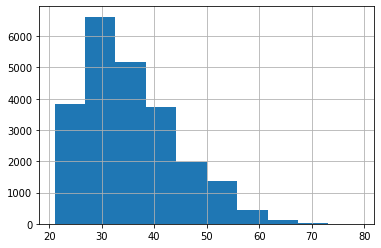

In [39]:
group_no.AGE.hist()